### Tuto détection de visage

### From scratch

La base de donnée vient de là https://www.cs.tau.ac.il/~wolf/ytfaces/, en gros on à tous les points correspondants aux parties du visage mais nous on va créer les données xmoy et ymoy correspondant aux coordonnées du centre de la boite et width et height correspondant à la longueur et hauteur du triangle.

In [1]:
import pandas as pd
df = pd.read_csv('face_images.csv')
df.head()

/tmp/ipykernel_59851/927538007.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,filename,xmin,ymin,xmax,ymax,x0,x1,x2,x3,x4,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,img_0062095.png,0.248175,0.339744,0.678832,0.717949,0.321168,0.321168,0.321168,0.343066,0.350365,...,0.647436,0.634615,0.615385,0.615385,0.615385,0.621795,0.621795,0.615385,0.628205,0.628205
1,img_0147100.png,0.412281,0.349593,0.763158,0.674797,0.438596,0.438596,0.438596,0.438596,0.447368,...,0.617886,0.609756,0.585366,0.593496,0.601626,0.601626,0.601626,0.609756,0.609756,0.601626
2,img_0149251.png,0.195572,0.256637,0.804428,0.743363,0.217712,0.217712,0.236162,0.236162,0.258303,...,0.672566,0.672566,0.654867,0.657817,0.657817,0.657817,0.657817,0.657817,0.657817,0.657817
3,img_0144988.png,0.213675,0.270677,0.743590,0.736842,0.316239,0.316239,0.333333,0.350427,0.376068,...,0.676692,0.676692,0.646617,0.639098,0.624060,0.624060,0.639098,0.654135,0.646617,0.646617
4,img_0086130.png,0.187990,0.070370,0.749347,0.866667,0.198433,0.198433,0.198433,0.198433,0.211488,...,0.777778,0.740741,0.677778,0.681481,0.681481,0.703704,0.744444,0.759259,0.759259,0.740741


In [2]:
df['xmoy'] = (df.xmax + df.xmin)/2
df['ymoy'] = (df.ymax + df.ymin)/2
df['w'] = (df.xmax - df.xmin)
df['h'] = (df.ymax - df.ymin)
df.head()

,filename,xmin,ymin,xmax,ymax,x0,x1,x2,x3,x4,...,y62,y63,y64,y65,y66,y67,xmoy,ymoy,w,h
0,img_0062095.png,0.248175,0.339744,0.678832,0.717949,0.321168,0.321168,0.321168,0.343066,0.350365,...,0.615385,0.621795,0.621795,0.615385,0.628205,0.628205,0.463504,0.528846,0.430657,0.378205
1,img_0147100.png,0.412281,0.349593,0.763158,0.674797,0.438596,0.438596,0.438596,0.438596,0.447368,...,0.601626,0.601626,0.601626,0.609756,0.609756,0.601626,0.587719,0.512195,0.350877,0.325203
2,img_0149251.png,0.195572,0.256637,0.804428,0.743363,0.217712,0.217712,0.236162,0.236162,0.258303,...,0.657817,0.657817,0.657817,0.657817,0.657817,0.657817,0.500000,0.500000,0.608856,0.486726
3,img_0144988.png,0.213675,0.270677,0.743590,0.736842,0.316239,0.316239,0.333333,0.350427,0.376068,...,0.624060,0.624060,0.639098,0.654135,0.646617,0.646617,0.478632,0.503759,0.529915,0.466165
4,img_0086130.png,0.187990,0.070370,0.749347,0.866667,0.198433,0.198433,0.198433,0.198433,0.211488,...,0.681481,0.703704,0.744444,0.759259,0.759259,0.740741,0.468668,0.468519,0.561358,0.796296


On affiche une image

2024-03-08 10:20:28.974476: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 10:20:29.092772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 10:20:29.092820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 10:20:29.094710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 10:20:29.113452: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 10:20:29.115725: I tensorflow/core/platform/cpu_feature_guard.cc:1

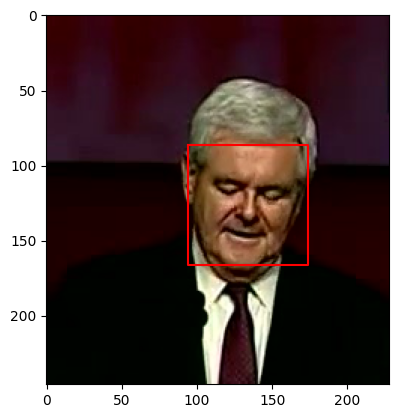

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

folder_images = 'images/'
tf.compat.v1.disable_eager_execution()

def load_image(filepath, resize=None):
    im = tf.io.read_file(folder_images + filepath)
    im = tf.image.decode_png(im, channels=3)
    if resize:
        im = tf.image.resize(im, resize)
    with tf.compat.v1.Session() as sess:
        im_np = sess.run(im)
    return im_np



def show_bounding_box(im, bbox, normalised=True, color='r'):
    # Signification de bbox
    x, y, w, h = bbox
    # Convertir les cordonées (x,y,w,h) en (x1,x2,y1,y2)
    x1=x-w/2
    x2=x+w/2
    y1=y-h/2
    y2=y+h/2
    
    # Redimensionner en cas de normalisation
    if normalised:
        x1=x1*im.shape[1]
        x2=x2*im.shape[1]
        y1=y1*im.shape[0]
        y2=y2*im.shape[0]
        
    # Afficher l'image
    plt.imshow(im)
    
    # Afficher la bounding box
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],"r")
    plt.show()

idx = 1
# Array de l'image
im = load_image(df.filename[idx])
# Coordonnées de la bounding box
bbox = df[['xmoy', 'ymoy', 'w', 'h']].values[idx]
# Afficher l'image ainsi que la bounding box
show_bounding_box(im, bbox)


In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train_path, X_test_path, y_train, y_test = train_test_split(df.filename, df[['xmoy', 'ymoy', 'w', 'h']], train_size=0.8, random_state=1234)

X_test = []
for p in tqdm(X_test_path):
    im = load_image(p, (256,256)).astype(np.uint8)
    X_test.append(im)
    
X_test = np.array(X_test)


100%|██████████████████████████████████████████████████████████████████████████| 400/400 [00:38<00:00, 10.38it/s]


In [5]:
import tensorflow as tf

@tf.function
def load_image(filepath, resize=(256,256)):
    im = tf.io.read_file(folder_images+filepath)
    im = tf.image.decode_png(im, channels=3)
    return tf.image.resize(im, resize)

dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))

dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)


### Transfer learning 

On instancie un modèle basé sur vgg16

In [6]:
from tensorflow.keras.applications import VGG16

# Charger le modèle VGG16 pré-entraîné
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Geler le backbone (les couches convolutionnelles)
for layer in vgg16.layers:
    layer.trainable = False

# Afficher un résumé du modèle
vgg16.summary()


2024-03-08 10:21:13.773030: W tensorflow/c/c_api.cc:305] Operation '{name:'block4_conv3/kernel/Assign' id:3445 op device:{requested: '', assigned: ''} def:{{{node block4_conv3/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](block4_conv3/kernel, block4_conv3/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

On rajoute des couches denses en sortie, avec une sortie à 4 neurones (pour les 4 valeurs à prédire) et activation linéaire comme c'est une prédiction.

In [7]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

On définit maintenant une fonction de perte et on compile le modèle.

In [8]:
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop


def loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred), axis=-1)

model.compile(loss=loss_function, optimizer=Adam(1e-3))


Et on entraine

In [10]:
model.fit(dataset_train, epochs=10)

2024-03-05 15:22:38.894372: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/bias/Assign' id:3796 op device:{requested: '', assigned: ''} def:{{{node dense_2/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_2/bias, dense_2/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2024-03-05 15:22:39.336804: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: type mismatch for node 'DatasetToGraphV2': expected a subtype of:
type_id: TFT_PRODUCT
args {
  type_id: TFT_ENCODED
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_FLOAT
        }
      }
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_DOUBLE
        }
      }
    }
  }
  args {
    type_id: TFT_STRING
  }
}

  got:
type_id: TFT_PRODUCT
args {
  type_id: TFT_ENCODED
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_FLOAT
        }
      }
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_DOUBLE
        }
      }
    }
  }
  args 

Train on 50 steps
Epoch 1/10


2024-03-05 15:22:39.735777: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:3820 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-03-05 15:22:39.943249: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_1/kernel/v/Assign' id:4010 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_1/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_1/kernel/v, training/Adam/dense_1/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Ei

50/50 [==============================] - 453s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 3.5289
Epoch 2/10
50/50 [==============================] - 438s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0537
Epoch 3/10
50/50 [==============================] - 439s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0333
Epoch 4/10
50/50 [==============================] - 440s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0264
Epoch 5/10
50/50 [==============================] - 438s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0242
Epoch 6/10
50/50 [==============================] - 438s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0213
Epoch 7/10
50/50 [==============================] - 438s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0197
Epoch 8/10
50/50 [==============================] - 447s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0183
Epoch 9/10
50/50 [==============================] - 446s 9s/step - batch: 24.5000 - size: 1.0000 - loss: 0.0163
Epo

on va essayer d'enregistrer le modèle et le load pour l'utiliser ensuite sans avoir à le fit à nouveau

In [11]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [6]:
ls saved_model/my_model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [9]:
new_model = tf.keras.models.load_model('saved_model/my_model', custom_objects={'loss_function':loss_function})

2024-03-08 10:21:17.752126: W tensorflow/c/c_api.cc:305] Operation '{name:'AssignVariableOp_65' id:4297 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_65}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](bias_14, Identity_39)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [10]:
new_model

/home/amyplant/.local/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-03-08 10:21:26.681914: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2_1/BiasAdd' id:4490 op device:{requested: '', assigned: ''} def:{{{node dense_2_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2_1/MatMul, dense_2_1/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


0.4598798 0.4576608 0.43630788 0.45750836
Execution time : 1.0539720058441162 secondes


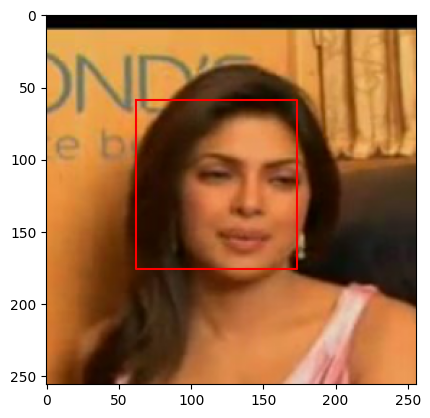

In [11]:
import time
def show_img(img, model):
    plt.imshow(img)
    t0=time.time()
    x, y, w, h = model.predict(np.array([img], dtype=np.float32))[0]
    print(x, y, w, h)
    print("Execution time :",time.time()-t0,"secondes")
    show_bounding_box(img/255, [x,y,w,h])
    plt.show()
    
## Exemple :
show_img(X_test[70], new_model)

On a bien save notre model dans saved_model/my_model et on a réussi à le load dans new_model et ca marche


0.43614885 0.43964893 0.4111658 0.42691937
Execution time : 0.4094376564025879 secondes


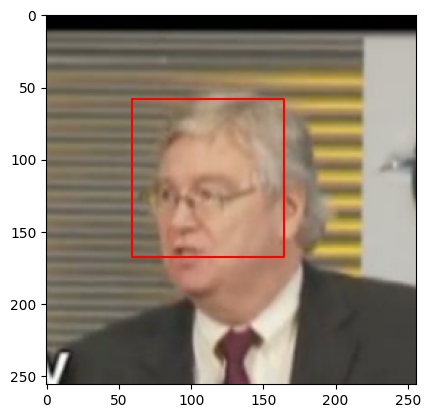

In [20]:
import time
def show_img(img, model):
    plt.imshow(img)
    t0=time.time()
    x, y, w, h = model.predict(np.array([img], dtype=np.float32))[0]
    print(x, y, w, h)
    print("Execution time :",time.time()-t0,"secondes")
    show_bounding_box(img/255, [x,y,w,h])
    plt.show()
    
## Exemple :
show_img(X_test[10], model)


Maintenant on va essayer d'appliquer notre modele sur une autre image en imprimant la bounding box avec cv2

In [18]:
import cv2
import numpy as np
#image = cv2.imread("lincoln.jpeg")
#image = cv2.imread("sara.jpg")
#image = cv2.imread("Le petit moche.jpeg")
image = cv2.imread("scotflied.jpg")
image = cv2.resize(image, (256, 256)) #expected vgg16_input to have shape (256, 256, 3)
#image = image / 255.0
cv2.imshow("image", image)
cv2.waitKey()   # 113 touche q
cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np
#image = cv2.imread("lincoln.jpeg")
#image = cv2.imread("sara.jpg")
#image = cv2.imread("Le petit moche.jpeg")
image = cv2.imread("scotflied.jpg")
image = cv2.resize(image, (256, 256)) #expected vgg16_input to have shape (256, 256, 3)
#image = image / 255.0
predictions = new_model.predict(np.expand_dims(image, axis=0))
print("prediction=", predictions)
for prediction in predictions:
    x, y, w, h = prediction
    x1 = x-w/2
    x2 = x+w/2
    y1 = y-h/2
    y2 = y+h/2
    print("x1,y1,x2,y2=", x1, y1, x2, y2)
    x1 = int(x1*image.shape[1])
    x2 = int(x2*image.shape[1])
    y1 = int(y1*image.shape[0])
    y2 = int(y2*image.shape[0])
    #print("x,y,w,h=", x, y, w, h)
    print("x1,y1,x2,y2=", x1, y1, x2, y2)
cv2.rectangle(image,(x1,y1),(x2,y2), (0, 255, 0), 2)
cv2.imshow("image", image)
cv2.waitKey()   # 113 touche q
cv2.destroyAllWindows()

prediction= [[0.52320045 0.53094715 0.49988386 0.5772405 ]]
x1,y1,x2,y2= 0.2732585221529007 0.24232688546180725 0.7731423825025558 0.8195674121379852
x1,y1,x2,y2= 69 62 197 209


In [20]:
import cv2
import numpy as np

# Capturer la vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

while True:
    # Lire la frame depuis la vidéo
    ret, frame = cap.read()
    if not ret:
        break
    
    # Prétraiter l'image pour l'entrée du modèle (à adapter selon votre modèle)
    frame = cv2.resize(frame, (256, 256))  # Redimensionnez selon les besoins de votre modèle
    #frame = frame / 255.0  # Normalisez les valeurs des pixels si nécessaire
    
    # Prédiction avec votre modèle de détection de visage
    # Remplacez cette partie par la prédiction de votre modèle
    # Assurez-vous que votre modèle renvoie les coordonnées du centre du rectangle, la largeur et la hauteur
    predictions = new_model.predict(np.expand_dims(frame, axis=0))
    #print("prediction=", prediction)
    # Dessiner un rectangle autour des visages détectés
    for prediction in predictions:
        x_center, y_center, width, height = prediction  # Récupérer les prédictions
        # Calculer les coins du rectangle
        x1 = x_center - width / 2
        x2 = x_center + width / 2
        y1 = y_center - height / 2
        y2 = y_center + height / 2
        x1 = int(x1*frame.shape[1])
        x2 = int(x2*frame.shape[1])
        y1 = int(y1*frame.shape[0])
        y2 = int(y2*frame.shape[0])
        # Dessiner le rectangle sur l'image
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Afficher la vidéo en direct avec les visages détectés
    cv2.imshow('Face Detection', frame)
    
    # Quitter la boucle si la touche 'q' est enfoncée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la capture vidéo et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()
